1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. .

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


En este examen los tres ejercicios están relacionados, de una forma u otra,  con el *cálculo de factoriales de enteros*. Debe sorprendernos, al menos un poco,  que sea posible calcular estos enteros enormes en tan poco tiempo, y  el tercer ejercicio empieza a indicar cómo podemos mejorar la simple multiplicación de los enteros entre $1$ y $n$.  

## Ejercicio 1 (4 puntos)

La congruencia de Wilson afirma que para todo número primo $p$ se verifica que el factorial de $p-1$ es congruente con $-1$ módulo $p$. Es interesante que el recíproco también es cierto: si un entero $n$ verifica la congruencia de Wilson entonces es primo, y por tanto la congruencia de Wilson puede servir como un criterio de primalidad.

El método más simple, pero no el más eficiente,  para determinar si un número $n$ es primo es la criba de Eratóstenes, es decir,  $n$ es primo si después de cribar la lista de enteros entre $2$ y $n$, ambos inclusive, $n$ está todavía en la lista cribada. Vimos en clase dos formas de implementar la criba, la segunda,  mucho más eficiente que la primera, se reproduce en la siguiente celda. 

**En este ejercicio debes comparar, en términos de eficiencia,  la criba con el criterio de Wilson como método para decidir si un entero $n$ es primo, es decir, debes producir  evidencia que demuestre, suficientemente, cuál de los dos métodos es mejor. No olvides discutir las consecuencias que obtienes del experimento.**

Para medir tiempos puedes usar la función de SAGE $cputime()$, y con los tiempos obtenidos debes generar gráficas que permitan **ver** la diferencia entre los métodos.

El número de enteros $n$ para los que medimos los tiempos  no puede ser muy grande, por ejemplo deberíamos conformarnos con unos $100$ enteros, pero los enteros $n$ habría que seleccionarlos, usando la función de SAGE $randint(N1,N2)$,  en rangos $[N1,N2]$ suficientemente grandes. Por ejemplo, puedes usar $[10^4,10^5]$ y también $[10^5,10^6]$. Los parámetros sugeridos son sólo una indicación, y puede ser necesario modificarlos, pero si se aumenta el rango, por ejemplo hasta $10^7$, sería conveniente disminuir el número de enteros para los que medimos los tiempos. 

**¿Qué buscamos con este experimento? Es muy posible que en cierto rango $[N1,N2]$ uno de los métodos sea sistemáticamente mejor y en otro rango lo sea el otro. Querríamos identificar aproximadamente dónde se produce, si es que se produce,  el cambio.**

In [1]:
def criba(n):
        '''n al menos 2'''
        aux = [True]*int(n)
        aux[0] = False
        aux[1] = False
        for i in xrange(2,floor(sqrt(n))+1):
            if aux[i]:
                for j in xrange(i*i,n,i):
                    aux[j] = False
        return [k for k in xrange(n) if aux[k]==True]

In [2]:
def primo_criba(n):
    L = criba(n+1)
    if L[-1]==n:
        return True
    else:
        return False

In [3]:
def wilson(n):
    if (factorial(n-1)+1)%n == 0:
        return True
    else:
        return False

Compruebo que las dos funciones producen el mismo resultado.

In [4]:
all([primo_criba(n)==wilson(n) for n in xsrange(2,100)])

True

In [5]:
def grafica_dif_tiempos(N,K1,K2):
    L = []
    for _ in xsrange(N):
        n = randint(K1,K2)
        tcpu0 = cputime()
        primo_criba(n)
        t1 = cputime()-tcpu0
        tcpu0 = cputime()
        wilson(n)
        t2 = cputime()-tcpu0
        L.append((n,1000*(t2-t1)))
    L.sort()
    return L

In [6]:
L1 = grafica_dif_tiempos(10**2,10**4,10**5)

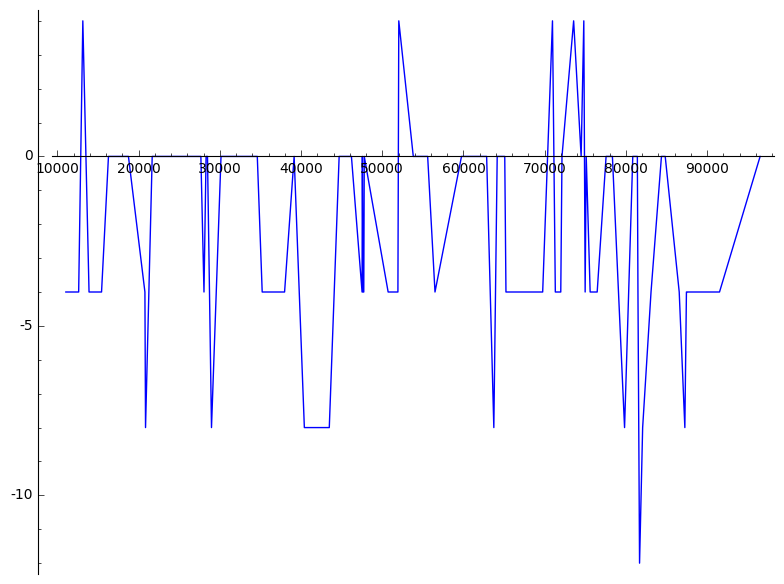

In [7]:
line(L1)

In [11]:
L2 = grafica_dif_tiempos(10**2,10**5,10**6)

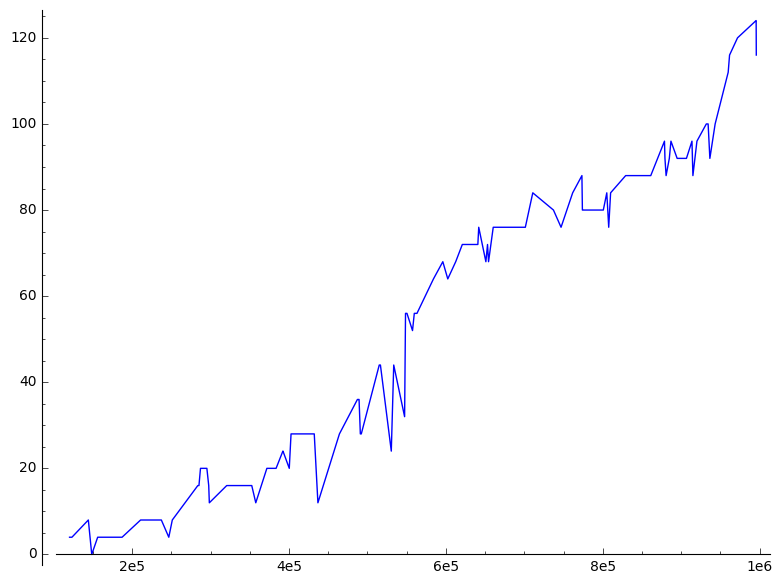

In [12]:
line(L2)

Parece claro que para enteros $n$ relativamente pequeños, en $L1$ entre $10^4$ y $10^5$, el método de Wilson es casi siempre mejor que la criba. Esto puede deberse a que el cálculo del factorial es, en este rango, muy rápido. En $L2$ tomamos los enteros entre $10^5$ y $10^6$ y la tendencia se invierte, siendo mucho peor el método que usa Wilson que la simple criba. Estos resultados pueden depender del *hardware*, es decir, se comprueba que el mismo código produce resultados significativamente diferentes en distintas máquinas.

Entonces, si vuelves a ejecutar estas celdas, en una máquina diferente, el párrafo anterior puede perder su sentido. 

## Ejercicio 2 (3 puntos)

En este ejercicio **estudiamos diversos métodos para calcular el número binomial $\binom{n}{m}$**, que,  por definición,  es el entero $$\binom{n}{m}:=\frac{n!}{m!(n-m)!},$$ y cuenta el número de subconjuntos con $m$ elementos de un conjunto de $n$ elementos. 

1) Un primer método,  que usaremos como base para nuestras comparaciones, consiste en usar la definición anterior
directamente, es decir, calculando los factoriales y realizando las operaciones indicadas. Define una función de SAGE de nombre $binomial\_1(n,m)$ y que devuelva el factorial calculado de esta manera. 

2) El cálculo anterior se puede organizar mejor: simplificamos $(n-m)!$ con parte de $n!$ y utilizamos que queda el mismo número de factores en el numerador que en el denominador para calcular el binomial más eficientemente. Define una función de SAGE de nombre $binomial\_2(n,m)$ y que devuelva el factorial calculado de esta manera. 

3) Otra manera de calcular el binomial es la base del *triángulo de Tartaglia*, es decir, las relaciones 
$$\binom{n}{0}=\binom{n}{n}=1;\binom{n}{m}=\binom{n-1}{m-1}+\binom{n-1}{m},$$
que permitirían una definición recursiva del binomial. NO se pide esta solución recursiva, que no sería nada eficiente,  sino una iterativa equivalente. Define una función de SAGE de nombre $binomial\_3(n,m)$ que utilice bucles y las relaciones anteriores para calcular el binomial. En cierto sentido este programa haría  lo mismo que cuando calculamos el triángulo de Tartaglia a mano. 

4) **Ejecuta las celdas incluidas al final de este ejercicio para comprobar que las funciones son correctas. ¿Algún comentario acerca de estos resultados?**

In [50]:
def binomial_1(n,m):
    return factorial(n)/(factorial(m)*factorial(n-m))

In [51]:
def binomial_2(n,m):
    prod = 1
    for i in xsrange(1,m+1):
        prod *= (n+1-i)/i
    return prod

In [ ]:
def binomial_2b(n,m):
    if m < n-m:
        prod = 1
        for i in xsrange(1,m+1):
            prod *= (n+1-i)/i
        return prod
    else:
        return binomial_2b(n,n-m)

In [13]:
def binomial_3(n,m):
    '''Tartaglia'''
    parc = [1,1]
    for N in xsrange(1,n):
        parc2 = [1]*(N+1)
        for N2 in xsrange(1,N):
            parc2[N2]= parc[N2-1]+parc[N2]
        parc = parc2
        del parc2
    return parc[m-1]+parc[m]

In [12]:
%time N = binomial(12456,652) ##Binomial de SAGE

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 951 µs


In [63]:
%time N == binomial_1(12456,652)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.22 ms


True

In [64]:
%time N == binomial_2(12456,652)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.69 ms


True

In [14]:
%time N == binomial_3(12456,652)

CPU times: user 1min 10s, sys: 500 ms, total: 1min 10s
Wall time: 1min 10s


True

1) En $binomial\_2b(n,m)$ se tiene en cuenta que $\binom{n}{m}=\binom{n}{n-m}$ para calcular el binomial que menos multiplicaciones requiera. 

2) Parece que la segunda forma de calcular el binomial es bastante mejor que la primera, al menos en ciertos rangos. Por una parte la definición del factorial de SAGE está muy optimizada, es decir debemos esperar que el número de multiplicaciones qiue realiza es el mínimo posible, pero sin calcular factoriales podemos calcular el binomial  con *pocos* productos de números racionales, y dependemos de la eficiencia de las simplificaciones de racionales que realiza SAGE. 

3) El método del *triángulo de Tartaglia* no parece muy eficiente, aunque sólo realiza sumas. Quizá se puede mejorar calculando en cada fila del triángulo únicamente los elementos cuyo valor influye en el binomial que estamos calculando. Por ejemplo,  para calcular $\binom{n}{m}$ sólo necesitamos de la fila anterior dos elementos. Para hacer esto dibuja en un triángulo de Tartaglia la zona que influye en el valor del elemento que queremos calcular, y lleva esa información al programa. 

4) Se puede completar el ejercicio comparando los dos primeros métodos en rangos mucho más amplios, y tratando de decidir si es verdad que el segundo siempre funciona mejor que el primero. 

## Ejercicio 3 (3 puntos)

Finalmente, estudiamos un **algoritmo para calcular factoriales** basado en el siguiente teorema:

*Dados un entero $n$ y un primo $p\le n$ el exponente de $p$ en la factorización de $n!$ en producto de primos es el entero $$exponente(p):=\sum_{i=1}^{i=\infty} floor(n/p^i).$$*

Observa que la suma es en realidad finita, ya que en cuanto $p^i$ supera a $n$ los sumandos son todos cero, y para todos los primos $p\le n$ el exponente correspondiente es al menos $1$. 

1) Define una función que reciba el entero $n$ como argumento y devuelva una lista de pares con el primer elemento de cada par uno de los primos $p\le n$  y el segundo el exponente que corresponde a $p$ de acuerdo al teorema mencionado. 
Para generar la lista de primos menores o iguales a $n$ puedes usar la función de SAGE $prime\_range$ o bien la función $criba$ del Ejercicio $1$. 

2) Define una función de nombre $factorial\_n(n)$ que en primer lugar llame a la función del apartado anterior, y luego calcule el producto de todos los primos elevado cada uno a su exponente. El resultado debe ser el factorial de $n$. Para elevar cada primo a su exponente debería usarse el algoritmo recursivo, bastante eficiente,  visto en clase. 

3) **Ejecuta las celdas al final de este ejercicio para comprobar que la función definida es correcta.**

4) **¿Se te ocurre alguna manera de mejorar la eficiencia de $factorial\_n(n)$? Explica.**



In [1]:
def primos(n):
    L = []
    L1 = prime_range(2,n+1)
    for p in L1:
        i = 1
        suma = 0
        while floor(n/(p**i))>=1:
            suma += floor(n/(p**i))
            i += 1
        L.append((p,suma))
    return L

In [2]:
def potencia(a,k):
    if k==0:
        return 1
    elif k %2 == 0:
        b = potencia(a,k/2)
        return (b*b)
    else:
        b = potencia(a,(k-1)/2)
        return (a*b*b) 

In [3]:
def factorial_n(n):
    L = primos(n)
    res = 1
    for item in L:
        res *= potencia(item[0],item[1])
    return res

In [8]:
%time L1 = factorial(657975) ##Factorial de SAGE

CPU times: user 220 ms, sys: 0 ns, total: 220 ms
Wall time: 219 ms


In [9]:
%time L1 == factorial_n(657975)

CPU times: user 35.8 s, sys: 204 ms, total: 36 s
Wall time: 35.7 s


True

1) Como alguien observó durante el examen, la función de SAGE $power(n,m)$ se puede utilizar en lugar de $potencia(n,m)$ y parece ser que es más eficiente.

2) De acuerdo a la metodología explicada en clase, siguiendo las notas de Pablo Angulo, lo primero que habría  que hacer es *perfilar* el código para saber en qué partes conviene concentrarse, y sobre la parte que más tiempo consume tratar de cambiar el método de cálculo. Si esto no es posible, sólo quedaría intentar usar Cython y numpy, eliminando previamente todas las llamadas a funciones de Python o SAGE que teníamos. 